In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:

data = pd.read_csv('/content/dataset.csv',sep='|')

In [4]:
data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [5]:
null_counts = data.isnull().sum()
print(null_counts)

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [6]:
print(data.duplicated().sum())

0


In [7]:
print(data.dtypes)

Name                            object
md5                             object
Machine                          int64
SizeOfOptionalHeader             int64
Characteristics                  int64
MajorLinkerVersion               int64
MinorLinkerVersion               int64
SizeOfCode                       int64
SizeOfInitializedData            int64
SizeOfUninitializedData          int64
AddressOfEntryPoint              int64
BaseOfCode                       int64
BaseOfData                       int64
ImageBase                      float64
SectionAlignment                 int64
FileAlignment                    int64
MajorOperatingSystemVersion      int64
MinorOperatingSystemVersion      int64
MajorImageVersion                int64
MinorImageVersion                int64
MajorSubsystemVersion            int64
MinorSubsystemVersion            int64
SizeOfImage                      int64
SizeOfHeaders                    int64
CheckSum                         int64
Subsystem                

In [8]:
label_encoder = LabelEncoder()
# Appliquer l'encodage des étiquettes aux colonnes catégorielles
data['Name'] = label_encoder.fit_transform(data['Name'])
data['md5'] = label_encoder.fit_transform(data['md5'])

In [9]:
data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,104383,39819,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,105410,73302,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,106014,31141,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,960,78100,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,102860,103346,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,44748,63122,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,13917,15286,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,44191,62367,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,20602,26689,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


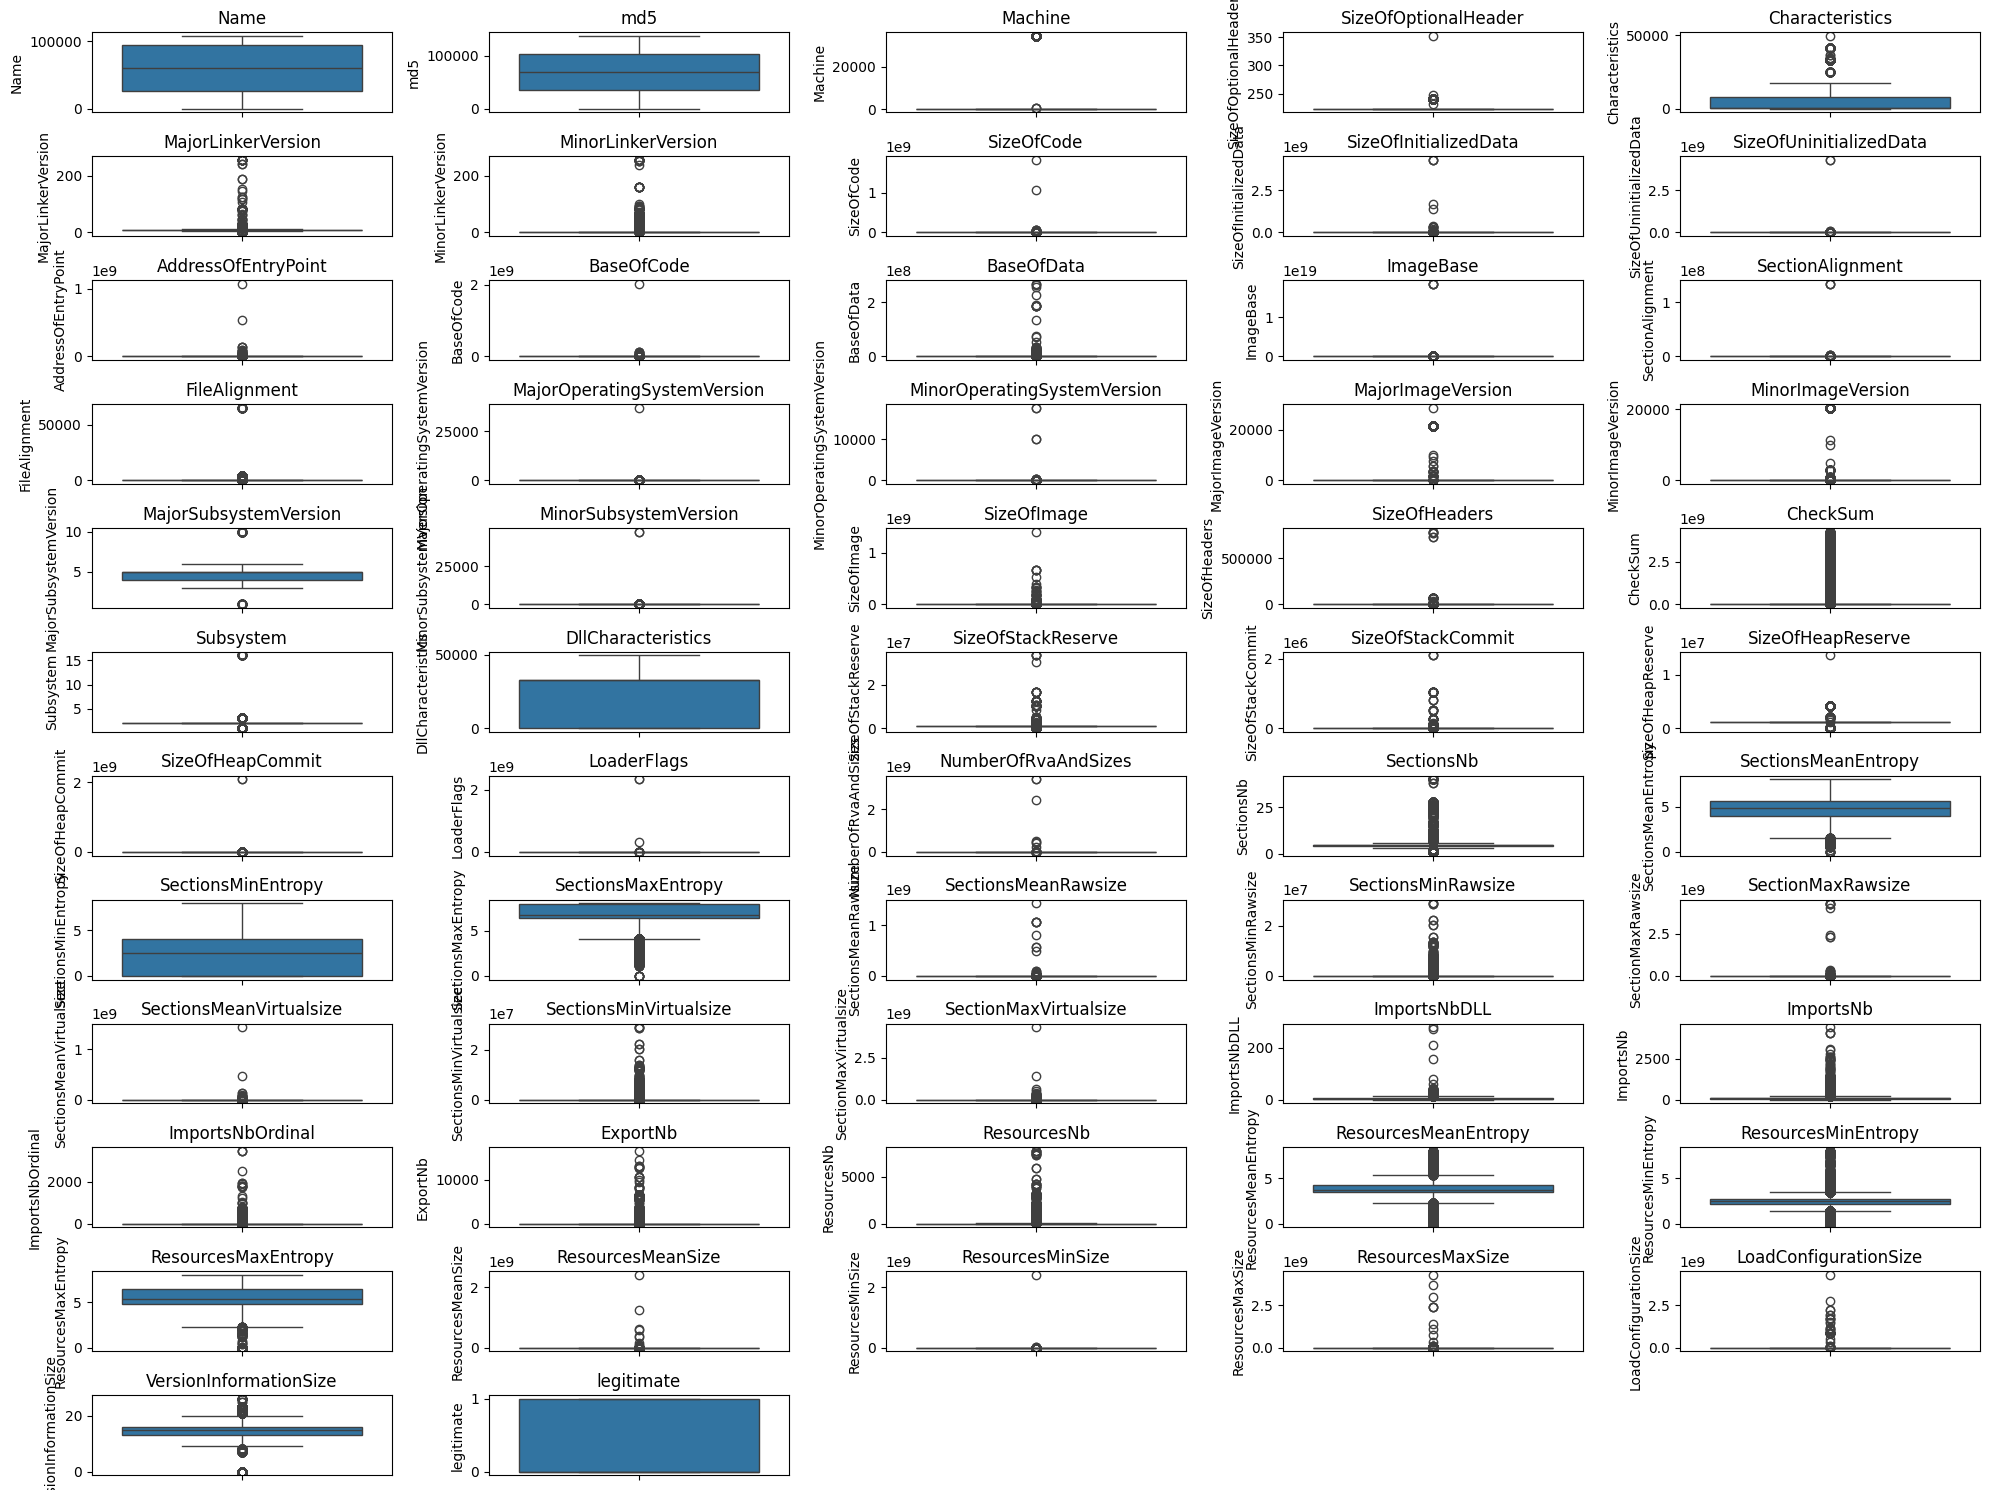

In [10]:
# Afficher les boxplots pour toutes les colonnes numériques
num_columns = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15))  # Ajuster la taille de la figure selon vos besoins
for i, column in enumerate(num_columns, 1):
    plt.subplot((len(num_columns) + 4) // 5, 5, i)  # Créer une grille de subplots
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

<Axes: >

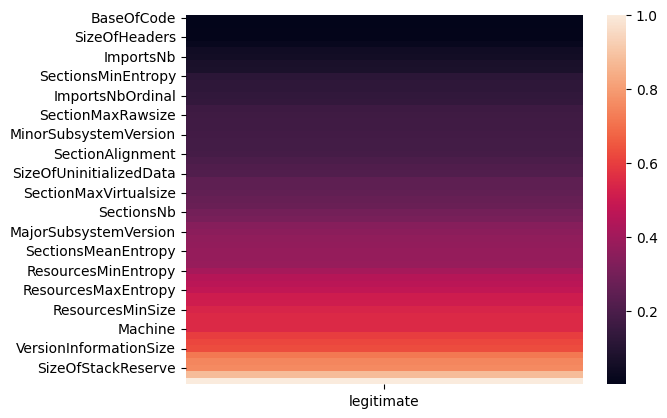

In [11]:
import seaborn as sns
sns.heatmap(data.corr('spearman').abs()[['legitimate']].sort_values('legitimate'))

<Axes: >

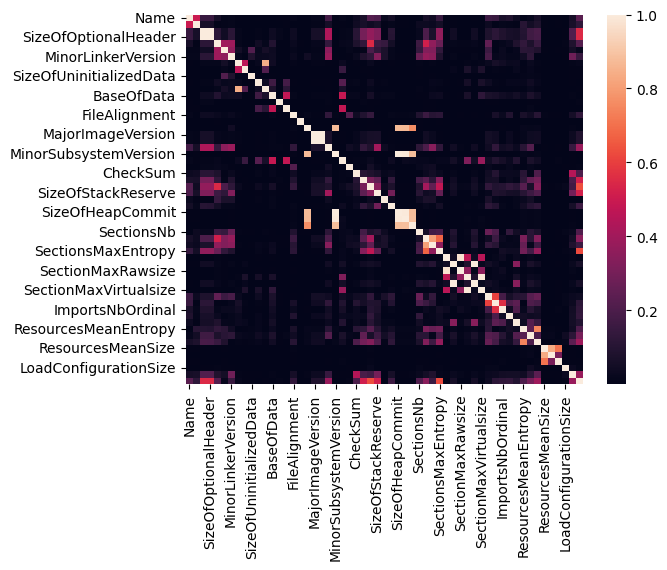

In [12]:
sns.heatmap(data.corr().abs())

In [13]:
# Définition de la fonction pour remplacer les valeurs aberrantes par la moyenne
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Définition des bornes pour les outliers
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR

    # Filtrage des outliers
    column_filtered = column[(column >= lower_bound) & (column <= upper_bound)]

    # Remplacement des outliers par la moyenne de la colonne
    column_mean = column_filtered.mean()

    # Création d'une copie explicite pour éviter l'avertissement SettingWithCopyWarning
    column_copy = column.copy()

    # Remplacement des valeurs aberrantes
    column_copy.loc[column_copy < lower_bound] = column_mean.astype(column.dtype)
    column_copy.loc[column_copy > upper_bound] = column_mean.astype(column.dtype)

    return column_copy

# Appliquer la fonction à chaque colonne contenant des valeurs aberrantes
columns_with_outliers = [
    'Machine',
    'SizeOfOptionalHeader',
    'Characteristics',
    'MajorLinkerVersion',
    'MinorLinkerVersion',
    'SizeOfCode',
    'SizeOfInitializedData',
    'SizeOfUninitializedData',
    'AddressOfEntryPoint',
    'BaseOfCode',
    'BaseOfData',
    'ImageBase',
    'SectionAlignment',
    'FileAlignment',
    'MajorOperatingSystemVersion',
    'MinorOperatingSystemVersion',
    'MajorImageVersion',
    'MinorImageVersion',
    'MajorSubsystemVersion',
    'MinorSubsystemVersion',
    'SizeOfImage',
    'SizeOfHeaders',
    'CheckSum',
    'Subsystem',
    'SizeOfStackReserve',
    'SizeOfStackCommit',
    'SizeOfHeapReserve',
    'SizeOfHeapCommit',
    'LoaderFlags',
    'NumberOfRvaAndSizes',
    'SectionsNb',
    'SectionsMeanEntropy',
    'SectionsMaxEntropy',
    'SectionsMeanRawsize',
    'SectionsMinRawsize',
    'SectionMaxRawsize',
    'SectionsMeanVirtualsize',
    'SectionsMinVirtualsize',
    'SectionMaxVirtualsize',
    'ImportsNbDLL',
    'ImportsNb',
    'ImportsNbOrdinal',
    'ExportNb',
    'ResourcesNb',
    'ResourcesMeanEntropy',
    'ResourcesMinEntropy',
    'ResourcesMaxEntropy',
    'ResourcesMeanSize',
    'ResourcesMinSize',
    'ResourcesMaxSize',
    'LoadConfigurationSize',
    'VersionInformationSize',
]

for column_name in columns_with_outliers:
    data[column_name] = replace_outliers_with_mean(data[column_name])

print(data)


          Name     md5  Machine  SizeOfOptionalHeader  Characteristics  \
0       104383   39819      332                   224              258   
1       105410   73302      332                   224             3330   
2       106014   31141      332                   224             3330   
3          960   78100      332                   224              258   
4       102860  103346      332                   224              258   
...        ...     ...      ...                   ...              ...   
138042   44748   63122      332                   224              258   
138043   13917   15286      332                   224             2553   
138044   44191   62367      332                   224              258   
138045   20602   26689      332                   224             2553   
138046   84768  114816      332                   224              258   

        MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                        9                   0   

In [14]:
data.describe()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.0,138047.0,138047.000000,138047.000000,138047.0,138047.000000,138047.000000,138047.0,...,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000
mean,58466.933486,69023.000000,332.0,224.0,2553.447174,9.348403,0.0,73618.105761,205856.627873,0.0,...,6.096764,3.706828,2.476098,5.446463,1952.045956,49.739364,8067.360950,39.410882,15.185038,0.299340
std,36022.208962,39850.880643,0.0,0.0,3541.598638,0.943230,0.0,44050.399386,163350.664678,0.0,...,3.506505,0.304154,0.159855,0.468467,1278.972407,22.944665,7042.230407,35.785555,0.797215,0.457971
min,0.000000,0.000000,332.0,224.0,2.000000,7.000000,0.0,0.000000,0.000000,0.0,...,1.000000,3.071256,1.919931,3.992057,0.000000,6.000000,0.000000,0.000000,12.000000,0.000000
25%,25728.500000,34511.500000,332.0,224.0,258.000000,9.000000,0.0,30208.000000,24576.000000,0.0,...,5.000000,3.524162,2.458492,5.317552,956.000000,48.000000,2216.000000,0.000000,15.000000,0.000000
50%,60240.000000,69023.000000,332.0,224.0,258.000000,9.000000,0.0,73618.000000,205856.000000,0.0,...,6.000000,3.706828,2.476098,5.446463,1952.045956,48.000000,8067.000000,72.000000,15.000000,0.000000
75%,94751.500000,103534.500000,332.0,224.0,8226.000000,10.000000,0.0,118784.000000,385024.000000,0.0,...,7.000000,3.756068,2.476098,5.446463,2738.833333,49.000000,9640.000000,72.000000,16.000000,1.000000
max,107487.000000,138046.000000,332.0,224.0,11534.000000,11.000000,0.0,165376.000000,565248.000000,0.0,...,17.000000,4.620300,2.955810,7.337647,9352.000000,174.000000,34561.000000,104.000000,17.000000,1.000000


In [15]:


data.columns = data.columns.str.strip()

columns_to_use = [
    'Machine', 'Name', 'md5', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion',
    'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData',
    'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment',
    'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion',
    'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion',
    'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'SizeOfStackReserve', 'SizeOfStackCommit',
    'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
    'SectionsMeanEntropy', 'SectionsMinEntropy',
    'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
     'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb',
    'ResourcesMeanEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy',
    'ResourcesMinSize', 'LoadConfigurationSize', 'VersionInformationSize'
]
existing_columns = [col for col in columns_to_use if col in data.columns]

# Sélection des caractéristiques (features) et de la cible (target)
X = data[existing_columns]
y = data['legitimate']

# Création du modèle Random Forest
forest = RandomForestRegressor()
forest.fit(X, y)

# Affichage de l'importance des caractéristiques
importances = forest.feature_importances_

# Créer un DataFrame pour afficher les importances triées
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Trier par importance croissante
importances_df_sorted = importances_df.sort_values(by='Importance')

print(importances_df_sorted)

                        Feature    Importance
0                       Machine  0.000000e+00
29             SizeOfHeapCommit  0.000000e+00
28            SizeOfHeapReserve  0.000000e+00
27            SizeOfStackCommit  0.000000e+00
26           SizeOfStackReserve  0.000000e+00
25                    Subsystem  0.000000e+00
23                SizeOfHeaders  0.000000e+00
19            MinorImageVersion  0.000000e+00
30                  LoaderFlags  0.000000e+00
14             SectionAlignment  0.000000e+00
11                   BaseOfCode  0.000000e+00
15                FileAlignment  0.000000e+00
31          NumberOfRvaAndSizes  0.000000e+00
9       SizeOfUninitializedData  0.000000e+00
42                     ExportNb  0.000000e+00
6            MinorLinkerVersion  0.000000e+00
3          SizeOfOptionalHeader  0.000000e+00
41             ImportsNbOrdinal  2.759703e-07
47             ResourcesMinSize  2.602618e-06
17  MinorOperatingSystemVersion  2.774677e-06
16  MajorOperatingSystemVersion  4

In [16]:
X = data[['Machine','ImageBase','Characteristics','CheckSum','MajorLinkerVersion',
         'SizeOfInitializedData','MajorImageVersion','ResourcesNb','MinorOperatingSystemVersion',
        'ImportsNb','SizeOfImage','AddressOfEntryPoint','VersionInformationSize'
         ]]
y = data['legitimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(max_depth=2,random_state=0)
model=clf.fit(X_train,y_train)

In [ ]:
from joblib import dump, load
dump(model, 'model66.pkl')


['model66.pkl']

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les différentes métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9777978993118436
Precision: 0.9688899648952911
Recall: 0.9574162679425837
F1 Score: 0.9631189459117984
